In [32]:
import os
import re
from datetime import datetime
import os
import matplotlib.pyplot as plt
import pandas as pd
import calendar


#Dics used:
DPatient={"cin":[], "nom":[], "prenom":[], "sexe": [],"age": []}
rdvs={"cin":[], "date":[], "time":[]}


##Repeatedly used functions:
def get_cin():
    print("Enter 'Abort' to cancel the operation at any step!")
    while True:
        cin = input('Please enter a CIN:')
        if cin.lower() == "abort":
            print("Operation aborted.")
            return None

        if cin.isdigit() and len(cin) == 8:
            if not check_cin(cin):
                return cin
            else:
                print("CIN not found. Please enter a valid CIN.")
        else:
            print("Invalid CIN. Please enter an 8-digit integer.")



def check_cin(cin):
    with open("DPatient.txt", 'r') as f:
        for line in f:
            if cin in line:
                return False
        return True


def check_appointment_availability(date, time):
    with open("rdv.txt", 'r') as f:
        for line in f:
            cin, date_rdv, time_rdv = line.strip().split(';')
            if date == date_rdv and time == time_rdv:
                return True
        return False

def check_date_availability(cin, date, time):
    with open("rdv.txt", 'r') as f:
        for line in f:
            cin_rdv, date_rdv, time_rdv = line.strip().split(';')
            if cin == cin_rdv and date == date_rdv:
                if time == time_rdv:
                    return True
        return False
    
    
def check_cin_date(cin, date):
    with open("rdv.txt", 'r') as f:
        for line in f:
            cin_rdv, date_rdv, time_rdv = line.strip().split(';')
            if cin == cin_rdv and date == date_rdv:
                return True
        return False

def get_date():
    while True:
        date = input("Enter the date of the appointment DD/MM/YYYY: ")
        if date.lower() == "abort":
            print("Operation aborted.")
            return None
        else:
            try:
                appointment_date = datetime.strptime(date, "%d/%m/%Y")
                if check_date(appointment_date):
                    return date
                else:
                    print("The appointment date must be in the future. Please enter a new date.")
            except ValueError:
                print("Invalid date format. Please use the format DD/MM/YYYY.")

def get_time(date):
    while True:
        temps = input("Enter the the time of the appointment HH:MM: ")
        if temps.lower() == "abort":
            print("Operation aborted.")
            return None
        else:
            try:
                appointment_time = datetime.strptime(temps, "%H:%M")
                return temps
            except ValueError:
                print("Invalid time format. Please use the format HH:MM.")


def get_date_noFcheck():
    while True:
        date = input("Enter the date of the appointment DD/MM/YYYY: ")
        if date.lower() == "abort":
            print("Operation aborted.")
            return None
        else:
            try:
                appointment_date = datetime.strptime(date, "%d/%m/%Y")
                return date
            except ValueError:
                print("Invalid date format. Please use the format DD/MM/YYYY.")
                
                
def check_date(appointment_date):
    now = datetime.now()
    if appointment_date < now:
        return False
    else:
        return True


In [79]:
def add_patient():
    print("Enter 'Abort' to cancel the operation at any step!")
    # Check if CIN is already present in the text file
    def check_cin(cin):
        with open("DPatient.txt", 'r') as f:
            for line in f:
                if cin in line:
                    return True
            return False

    while True:
        cin = input('Please enter a CIN:')
        if cin.lower() == "abort":
            print("Operation aborted.")
            return

        if cin.isdigit() and len(cin) == 8:
            if not check_cin(cin):
                break
            else:
                print("This CIN is already in use. Please enter a valid CIN.")
        else:
            print("Invalid CIN. Please enter an 8-digit integer.")
    
    # Rest of the function remains the same
    while True:
        nom = input('Please enter a First Name:')
        if nom.lower() == "abort":
            print("Operation aborted.")
            return

        if all(c.isalpha() or c.isspace() for c in nom):
            break
        else:
            print("Invalid first name. Please enter a string containing only letters and spaces.")

    while True:
        prenom = input('Please enter a Last Name:')
        if all(c.isalpha() or c.isspace() for c in prenom):
            break
        else:
            print("Invalid last name. Please enter a string containing only letters and spaces.")
    
    while True:
        sexe = input('Please enter "Male" or "Female":')
        if sexe.lower() == "abort":
            print("Operation aborted.")
            return

        if sexe.lower() in ["male", "female"]:
            break
        else:
            print("Invalid sex. Please enter either 'Male' or 'Female'.")
            
    while True:
        age = input("Please enter the patient's age:")
        if age.lower() == "abort":
            print("Operation aborted.")
            return

        if age.isdigit() and int(age) > 0:
            break
        else:
            print("Invalid age. Please enter a positive integer.")
    
    # Add the patient data to the dictionary and text file
    DPatient["cin"].append(cin)
    DPatient["nom"].append(nom)
    DPatient["prenom"].append(prenom)
    DPatient["sexe"].append(sexe)
    DPatient["age"].append(age)
    
    with open("DPatient.txt", 'a') as f:
        print(cin, nom, prenom, sexe, age)
        f.write('%s;%s;%s;%s;%s\n' % (cin, nom, prenom, sexe, age))
        print("Patient data successfully added.")


In [4]:
def delete_patient():
    print("Enter 'Abort' to cancel the operation at any step!")
    while True:
        cin = input('Please enter the CIN of the patient you want to delete:')
        if cin.lower() == "abort":
            print("Operation aborted.")
            return
        if cin.isdigit() and len(cin) == 8:
            # Check if the CIN exists in the DPatient text file
            with open("DPatient.txt", "r") as f:
                for line in f:
                    if cin in line:
                        break
                else:
                    print("CIN not found. Please enter a valid CIN.")
                    continue
            break
        else:
            print("Invalid CIN. Please enter an 8-digit integer.")
    
    #index = DPatient["cin"].index(cin)
    #del DPatient["cin"][index]
    #del DPatient["nom"][index]
    #del DPatient["prenom"][index]
    #del DPatient["sexe"][index]
    #del DPatient["age"][index]
    
    with open("DPatient.txt", "r") as f:
        lines = f.readlines()
    with open("DPatient.txt", "w") as f:
        for line in lines:
            if not line.startswith(cin):
                f.write(line)
    
    print("Patient successfully deleted.")


In [32]:
def check_cin(cin):
    with open("DPatient.txt", 'r') as f:
        for line in f:
            if cin in line:
                return False
        return True


def check_appointment_availability(date, time):
    with open("rdv.txt", 'r') as f:
        for line in f:
            cin, date_rdv, time_rdv = line.strip().split(';')
            if date == date_rdv and time == time_rdv:
                return True
        return False

def get_date():
    while True:
        date = input("Enter the date of the appointment DD/MM/YYYY: ")
        if date.lower() == "abort":
            print("Operation aborted.")
            return None
        else:
            try:
                appointment_date = datetime.strptime(date, "%d/%m/%Y")
                if check_date(appointment_date):
                    return date
                else:
                    print("The appointment date must be in the future. Please enter a new date.")
            except ValueError:
                print("Invalid date format. Please use the format DD/MM/YYYY.")

def get_time(date):
    while True:
        temps = input("Enter the the time of the appointment HH:MM: ")
        if temps.lower() == "abort":
            print("Operation aborted.")
            return None
        else:
            try:
                appointment_time = datetime.strptime(temps, "%H:%M")
                return temps
            except ValueError:
                print("Invalid time format. Please use the format HH:MM.")

def check_date(appointment_date):
    now = datetime.now()
    if appointment_date < now:
        return False
    else:
        return True

def add_appointment():
    cin = get_cin()
    if cin is None:
        return

    while True:
        # Get the date input from the user
        date = get_date()
        if date is None:
            return

        # Get the time input from the user
        time = get_time(date)
        if time is None:
            return

        # Check if the appointment is available
        if not check_appointment_availability(date, time):
            break

        print("An appointment already exists at this date and time. Please enter a new date and time.")

    # Add the appointment to the file
    with open("rdv.txt", "a") as file:
        file.write('%s;%s;%s\n' % (cin, date, time))
        print("Appointment successfully added.")



In [6]:
def check_appointment_availability(date, time):
    with open("rdv.txt", 'r') as f:
        for line in f:
            cin, date_rdv, time_rdv = line.strip().split(';')
            if date == date_rdv and time == time_rdv:
                return True
        return False

def get_date():
    while True:
        date = input("Enter the date of the appointment DD/MM/YYYY: ")
        if date.lower() == "abort":
            print("Operation aborted.")
            return None
        else:
            try:
                appointment_date = datetime.strptime(date, "%d/%m/%Y")
                if check_date(appointment_date):
                    return date
                else:
                    print("The appointment date must be in the future. Please enter a new date.")
            except ValueError:
                print("Invalid date format. Please use the format DD/MM/YYYY.")

def get_time(date):
    while True:
        temps = input("Enter the the time of the appointment HH:MM: ")
        if temps.lower() == "abort":
            print("Operation aborted.")
            return None
        else:
            try:
                appointment_time = datetime.strptime(temps, "%H:%M")
                return temps
            except ValueError:
                print("Invalid time format. Please use the format HH:MM.")

def check_date(appointment_date):
    now = datetime.now()
    if appointment_date < now:
        return False
    else:
        return True

def edit_appointment():
    cin = get_cin()
    if cin is None:
        return

    # Find all the appointments for the given CIN
    appointments = []
    with open("rdv.txt", 'r') as f:
        for line in f:
            cin_rdv, date_rdv, time_rdv = line.strip().split(';')
            if cin_rdv == cin:
                appointments.append((date_rdv, time_rdv))

    # Present the list of appointments to the user and ask them to choose which one to edit
        if len(appointments) == 0:
            print("There are no appointments to edit.")
            print("Operation aborted.")
            return None
        else:
            print("Which appointment would you like to edit? Enter the number of the appointment:")
            for i, appointment in enumerate(appointments):
                date_rdv, time_rdv = appointment
                appointment_date = datetime.strptime(date_rdv, "%d/%m/%Y")
                appointment_time = datetime.strptime(time_rdv, "%H:%M")
                print("%d. %s at %s" % (i+1, appointment_date.strftime("%d/%m/%Y"), appointment_time.strftime("%H:%M")))
            while True:
                try:
                    choice = int(input()) - 1
                    original_date, original_time = appointments[choice]
                    break
                except (ValueError, IndexError):
                    print("Invalid choice. Please try again.")

    # Get the new date and time for the appointment
    print("Enter the new date and time for the appointment:")
    date = get_date()
    if date is None:
        return
    time = get_time(date)
    if time is None:
        return

    # Check if the new appointment time is available
    while check_appointment_availability(date, time):
        print("An appointment already exists at this date and time. Please enter a new date and time.")
        date = get_date()
        if date is None:
            return
        time = get_time(date)
        if time is None:
            return

    # Update the appointment in rdv.txt
    new_appointments = []
    with open("rdv.txt", 'r') as f:
        for line in f:
            cin_rdv, date_rdv, time_rdv = line.strip().split(';')
            if cin_rdv == cin and date_rdv == original_date and time_rdv == original_time:
                new_appointments.append(cin + ';' + date + ';' + time)
            else:
                new_appointments.append(line.strip())

    with open("rdv.txt", 'w') as f:
        for appointment in new_appointments:
            f.write(appointment + '\n')
    print("Appointment successfully edited.")


In [7]:
##New version

def check_cin(cin):
    with open("DPatient.txt", 'r') as f:
        for line in f:
            if cin in line:
                return False
        return True


def delete_appointment():
    cin = get_cin()
    if cin is None:
        return

    # Find all the appointments for the given CIN
# Find all the appointments for the given CIN
    appointments = []
    with open("rdv.txt", 'r') as f:
        for line in f:
            cin_rdv, date_rdv, time_rdv = line.strip().split(';')
            if cin_rdv == cin:
                appointments.append((date_rdv, time_rdv))

    if len(appointments) == 0:
        print("There are no appointments to delete.")
        print("Operation aborted.")
        return None
    else:
        while True:
            print("Enter the number of the appointment that you want to delete, or 'Abort' to cancel the operation:")
            for i, appointment in enumerate(appointments):
                date_rdv, time_rdv = appointment
                appointment_date = datetime.strptime(date_rdv, "%d/%m/%Y")
                appointment_time = datetime.strptime(time_rdv, "%H:%M")
                print("%d. %s at %s" % (i+1, appointment_date.strftime("%d/%m/%Y"), appointment_time.strftime("%H:%M")))

            choice = input()
            if choice.lower() == "abort":
                print("Operation aborted.")
                return None

            try:
                choice = int(choice) - 1
                original_date, original_time = appointments[choice]
                break
            except (ValueError, IndexError):
                print("Invalid choice. Please try again.")

    # Delete the selected appointment
    with open("rdv.txt", 'r') as f:
        lines = f.readlines()

    with open("rdv.txt", 'w') as f:
        for line in lines:
            cin_rdv, date_rdv, time_rdv = line.strip().split(';')
            if cin_rdv != cin or (cin_rdv == cin and (date_rdv != original_date or time_rdv != original_time)):
                f.write("%s;%s;%s\n" % (cin_rdv, date_rdv, time_rdv))

    print("Appointment successfully deleted.")


In [6]:
def create_prescription():
    cin = get_cin()
    if cin is None:
        return

    # Retrieve the patient's appointments from the DAppointments.txt file
    appointments = []
    with open("rdv.txt", 'r') as f:
        for line in f:
            if cin in line:
                _, date, time= line.strip().split(';')
                appointments.append((date, time))

    if not appointments:
        print("No appointments found for this patient.")
        return

    # Print the list of the last 5 appointments and prompt the user to select one
    print("Select an appointment:")
    for i, appointment in enumerate(appointments[-5:]):
        print(f"{i+1}. {appointment[0]} at {appointment[1]}")
    while True:
        selection = input("Enter the number of the appointment you want to select (or 'manual' to enter an appointment):")
        if selection.lower() == "abort":
            print("Operation cancelled.")
            return None

        if selection.lower() == "manual":
            # Initialize a variable to track whether a valid date and time have been entered
            is_valid = False

            # Prompt the user for the date and time of the appointment
            while not is_valid:
                date = get_date_noFcheck()
                if date is None:
                    return

                # Check if the CIN and date are linked in the rdv.txt file
                if check_cin_date(cin, date):
                    time = get_time(date)
                    if time is None:
                        return

                    # Check if the appointment already exists
                    if check_date_availability(cin, date, time):
                        # If a valid date and time have been entered, set is_valid to True and break out of the loop
                        is_valid = True
                        break
                    else:
                        print("The appointment does not exist. Please enter a valid time.")
                else:
                    print("Patient doesn't have an appointment on the that date. Please enter a valid date.")

            # Break out of the outer loop once a valid manual appointment has been entered
            break
        else:
            try:
                selection = int(selection)
                if 1 <= selection <= len(appointments[-5:]):
                    # Retrieve the selected appointment from the list
                    date, time = appointments[-5:][selection-1]
                    break
            except ValueError:
                pass
            print("Please enter a valid input.")

        
    first_name = None
    last_name = None
    with open("DPatient.txt", 'r') as f:
        for line in f:
            if cin in line:
                _, first_name, last_name, _, _, = line.strip().split(';')
                break

    # Create the filename based on the patient's first and last name
    date = date.replace("/", "-")
    time = time.replace(":", "-")
    filename = f"{first_name}_{last_name}_{date}_{time}.txt"

    # Initialize a list to store the medication information
    medications = []

    # Prompt the user for medication information
    while True:
        name = input("Enter the name of the medication:")
        if name.lower() == "abort":
            print("Operation cancelled.")
            return 
        else:
            quantity = input("Enter the quantity of the medication:")
            if quantity.lower() == "abort":
                print("Operation cancelled.")
                return
            duration = input("Enter the duration of treatment with the medication:")
            if duration.lower() == "abort":
                print("Operation cancelled.")
                return

            # Add the medication information to the list
            medications.append((name, quantity, duration))
        while True:
            add_more = input("Do you want to add a new medication? (Yes/No)")
            if add_more.lower() == "abort":
                print("Operation cancelled.")
                return 
            elif add_more.lower() == "yes":
                break
            elif add_more.lower() == "no":
                break
            else:
                print("Please enter a valid input (Yes/No)")
        if add_more.lower() == "no":
            break

    # Open the file in write mode
    with open(filename, 'w') as x:
        # Write the appointment information to the file
        date = date.replace("-", "/")
        time = time.replace("-", ":")
        x.write(f"{cin};{first_name};{last_name};{date};{time}\n")

        # Write the medication information to the file
        for medication in medications:
            x.write(f"{medication[0]} {medication[1]} {medication[2]}\n")
    print(appointments)
    print(filename)
    print("Prescription file created successfully!")


In [9]:
def historique_patient():
    cin = get_cin()
    if cin is None:
        return

    # Create the filename based on the patient's first and last name
    first_name = None
    last_name = None
    with open("DPatient.txt", 'r') as f:
        for line in f:
            if cin in line:
                _, first_name, last_name, _, _, = line.strip().split(';')
                break

    filename = f"Historique_{first_name}_{last_name}.txt"

    # Check if the historique file already exists
    if os.path.exists(filename):
        # If the historique file already exists, delete it
        os.remove(filename)
        print("File already exists. Original file DELETED.")

    # Iterate through the files in the folder
    files_found = False
    for file in os.listdir("."):
        # Check if the file starts with the patient's first and last name
        if file.startswith(f"{first_name}_{last_name}"):
            files_found = True
            # Read the file and retrieve the patient's CIN, first and last name, date, and time
            with open(file, 'r') as f:
                cin_line = f.readline()
                cin, first_name, last_name, date, time = cin_line.strip().split(';')

                # Write the patient's CIN, first and last name, date, and time to the historique file
                with open(filename, 'a') as historique:
                    historique.write(f"{cin};{first_name};{last_name};{date};{time}\n")

                    # Write the medication data to the historique file
                    for line in f:
                        historique.write(line)
            
            # Write a line of dashes to the historique file to separate the data from different appointments
            with open(filename, 'a') as historique:
                
                first_line_length = len(cin_line)
                # Write a line of dashes with the same length as the first line
                historique.write("-" * first_line_length + "\n")
    
    if not files_found:
        # If no files were found, print a message and abort the operation
        print("No prescription files exist. Operation aborted.")
        return

    print("Historique file created successfully.")


In [36]:
def plot_consultations_per_month():
    # Get the patient's CIN
    cin = get_cin()
    if cin is None:
        return

    # Import data
    df = pd.DataFrame(columns=["CIN", "Date", "Time"])
    with open("rdv.txt", "r") as f:
        for line in f:
            # Split the line into columns
            columns = line.strip().split(";")
            if len(columns) == 3:
                # Add a row to the DataFrame for this consultation
                df.loc[len(df)] = (columns[0], columns[1], columns[2])

    # Filter the data to only include the specified CIN
    df = df[df["CIN"] == cin]
    
        # Read the "DPatient.txt" file into a list of lines
    with open("DPatient.txt", 'r') as f:
        lines = f.readlines()

    # Iterate through the lines
    for line in lines:
        # Split the line into columns
        columns = line.strip().split(';')
        if len(columns) == 5:
            # Check if the CIN in the line matches the input CIN
            if columns[0] == cin:
                # Extract the first name and last name from the line
                first_name = columns[1]
                last_name = columns[2]
                # Append the first name and last name to the DataFrame as new columns
                df["First Name"] = first_name
                df["Last Name"] = last_name
    #change the location of each collumn for better visibility.
    df = df.reindex(columns=["CIN", "First Name", "Last Name", "Date", "Time"])

    # Convert the "Date" column to a datetime data type
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, format="%d/%m/%Y")

    # Extract the month and year from the "Date" column and create new "Month" and "Year" columns
    df["Month"] = df["Date"].dt.month
    df["Year"] = df["Date"].dt.year
    df["Day"] = df["Date"].dt.day
    
    # Group the consultations by day and count the number of consultations for each day
    # Group the data by month and year
    consultations_per_day = df.groupby(["Month", "Year", "Day"]).size().reset_index(name="Consultations")

    # Get the month from the user
    # Get the month from the user
    while True:
        try:
            month = int(input("Enter the month you would like to plot (1-12): "))
            if month < 1 or month > 12:
                raise ValueError
            break
        except ValueError:
            print("Invalid month. Please enter a value between 1 and 12.")

    # Check if the patient has appointments in the specified month
    if not (df["Month"] == month).any():
        print("The patient does not have any appointments in the specified month.")
        return

    # Get the year from the user
    while True:
        try:
            year = int(input("Enter the year you would like to plot: "))
            break
        except ValueError:
            print("Invalid year. Please enter a valid year.")

    # Check if the patient has appointments in the specified month and year
    if not ((df["Month"] == month) & (df["Year"] == year)).any():
        print("The patient does not have any appointments in the specified month and year.")
        return

    # Get the number of days in the month
    days_in_month = calendar.monthrange(year, month)[1]

    # Get the number of days in the month
    #days_in_month = calendar.monthrange(year, month)[1]

    # Filter the data to only include the specified month and year, and the days that are present in the month
    data = consultations_per_day[(consultations_per_day["Month"] == month) & (consultations_per_day["Year"] == year) & (consultations_per_day["Day"] <= days_in_month)]

    # Plot the number of consultations per day for this month
    data = data.copy() # handle data warrning
    data["Day"] = data["Day"].astype(str)
    

    plt.plot(data["Day"], data["Consultations"], label="Evolution of consultations")
    plt.scatter(data["Day"], data["Consultations"], label="Day of appointment")

    #plt.plot(data["Day"], data["Consultations"])
    ax = plt.gca()
    plt.xticks(range(len(data)), data["Day"])
    ax.set_xticklabels(data["Day"])

    # Add a title and labels for the x and y axes
    plt.title('Consultations per month')
    plt.xlabel('Day')
    plt.ylabel('Number of Consultations')

    # Show the plot
    #plt.scatter(data["Day"], data["Consultations"])
    plt.legend()
    print(df)
    plt.show()


In [33]:
def plot_consultations_per_year():
    # Get the patient's CIN
    cin = get_cin()
    if cin is None:
        return

    # Import data
    df = pd.DataFrame(columns=["CIN", "Date", "Time"])
    with open("rdv.txt", "r") as f:
        for line in f:
            # Split the line into columns
            columns = line.strip().split(";")
            if len(columns) == 3:
                # Add a row to the DataFrame for this consultation
                df.loc[len(df)] = (columns[0], columns[1], columns[2])

    # Filter the data to only include the specified CIN
    df = df[df["CIN"] == cin]
    
        # Read the "DPatient.txt" file into a list of lines
    with open("DPatient.txt", 'r') as f:
        lines = f.readlines()

    # Iterate through the lines
    for line in lines:
        # Split the line into columns
        columns = line.strip().split(';')
        if len(columns) == 5:
            # Check if the CIN in the line matches the input CIN
            if columns[0] == cin:
                # Extract the first name and last name from the line
                first_name = columns[1]
                last_name = columns[2]
                # Append the first name and last name to the DataFrame as new columns
                df["First Name"] = first_name
                df["Last Name"] = last_name
    #change the location of each collumn for better visibility.
    df = df.reindex(columns=["CIN", "First Name", "Last Name", "Date", "Time"])

    # Convert the "Date" column to a datetime data type
    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, format="%d/%m/%Y")
    #df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)




    # Extract the month and year from the "Date" column and create new "Month" and "Year" columns
    df["Month"] = df["Date"].dt.month
    df["Year"] = df["Date"].dt.year

    # Group the data by year and month and count the number of consultations for each month
    consultations_per_month = df.groupby(["Year", "Month"]).size().reset_index(name="Consultations")

    # Get the year from the user
    while True:
        try:
            year = int(input("Enter the year you would like to plot: "))
            break
        except ValueError:
            print("Invalid year. Please enter a valid year.")

    # Check if the patient has appointments in the specified year
    if not (df["Year"] == year).any():
        print("The patient does not have any appointments in the specified year.")
        return

    # Group the data by month and year
    consultations_per_month = df.groupby(["Month", "Year"]).size().reset_index(name="Consultations")

    # Filter the data to only include the specified year
    data = consultations_per_month[consultations_per_month["Year"] == year]

    # Convert the month number to the month name
    data["Month"] = data["Month"].apply(lambda x: calendar.month_name[x])

    # Plot the number of consultations per month for this year
    plt.plot(data["Month"], data["Consultations"], label="Evolution of consultations")
    plt.scatter(data["Month"], data["Consultations"], label="Month of appointment")

    # Add a title and labels for the x and y axes
    plt.title('Consultations per month')
    plt.xlabel('Month')
    plt.ylabel('Number of consultations')


    # Set the x axis tick labels to only show the first 3 letters of the month name
    ax = plt.gca()
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels([x[:3] for x in data["Month"]])

    # Show the plot
    print(df)
    plt.legend()
    plt.show()


Enter 'Abort' to cancel the operation at any step!
Please enter a CIN:69696969
Enter the month you would like to plot (1-12): 1
Enter the year you would like to plot: 2025


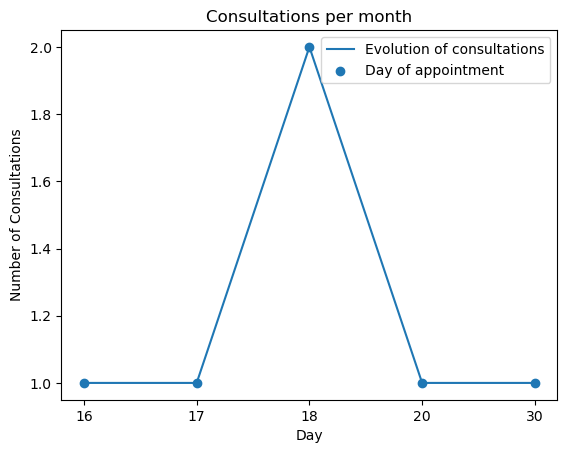

In [35]:
plot_consultations_per_month()

Enter 'Abort' to cancel the operation at any step!
Please enter a CIN:69696969
Enter the year you would like to plot: 2025
         CIN First Name Last Name       Date   Time  Month  Year
8   69696969      Hamdi  Sadkaoui 2025-01-16  10:10      1  2025
9   69696969      Hamdi  Sadkaoui 2025-01-17  10:10      1  2025
10  69696969      Hamdi  Sadkaoui 2025-01-18  10:10      1  2025
11  69696969      Hamdi  Sadkaoui 2025-01-20  10:10      1  2025
12  69696969      Hamdi  Sadkaoui 2025-01-18  14:14      1  2025
13  69696969      Hamdi  Sadkaoui 2025-01-30  10:10      1  2025
14  69696969      Hamdi  Sadkaoui 2025-02-08  10:10      2  2025
15  69696969      Hamdi  Sadkaoui 2025-02-08  14:14      2  2025
16  69696969      Hamdi  Sadkaoui 2025-05-08  10:10      5  2025
17  69696969      Hamdi  Sadkaoui 2025-10-08  10:10     10  2025
18  69696969      Hamdi  Sadkaoui 2025-12-08  10:10     12  2025


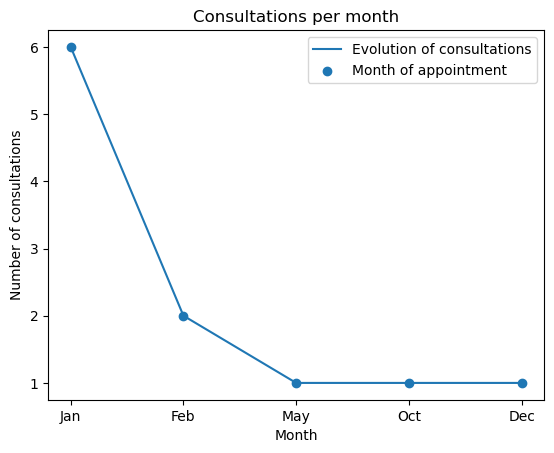

In [25]:
plot_consultations_per_year()